## Lets try Churn prediction using ANN with Tensorflow

In [105]:
import numpy as np
import pandas as pd 
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv('./Churn_Modelling.csv')
df.sample(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7781,7782,15759184,Russell,705,France,Male,34,7,117715.84,1,1,0,2498.67,0
2868,2869,15707968,Akobundu,545,Spain,Male,36,8,73211.12,2,1,0,89587.34,1


### Interesing, If I want to predict churning: fields like RowNumber , CustomerId, etc won't effect 

In [107]:
fieldsToDel = ['RowNumber','CustomerId','Surname']
df.drop(fieldsToDel,axis='columns',inplace=True)
df.sample(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9728,616,Germany,Female,43,7,95984.21,1,0,1,115262.54,1
7747,850,France,Female,24,6,0.00,2,1,1,13159.90,0


### Next important step to check null , na values and incorrect data type

In [108]:
def checkData(df):
    for col in df.columns:
        uniqueDatas = df[col].unique()
        print(f"Col: {col} , dtype: {df[col].dtype} , isna: {df[col].isna().unique()} , isnull: {df[col].isnull().unique()}")
        print(f"Unique Data({len(uniqueDatas)}) like: {uniqueDatas[0:5]} \n")

checkData(df)

Col: CreditScore , dtype: int64 , isna: [False] , isnull: [False]
Unique Data(460) like: [619 608 502 699 850] 

Col: Geography , dtype: object , isna: [False] , isnull: [False]
Unique Data(3) like: ['France' 'Spain' 'Germany'] 

Col: Gender , dtype: object , isna: [False] , isnull: [False]
Unique Data(2) like: ['Female' 'Male'] 

Col: Age , dtype: int64 , isna: [False] , isnull: [False]
Unique Data(70) like: [42 41 39 43 44] 

Col: Tenure , dtype: int64 , isna: [False] , isnull: [False]
Unique Data(11) like: [2 1 8 7 4] 

Col: Balance , dtype: float64 , isna: [False] , isnull: [False]
Unique Data(6382) like: [     0.    83807.86 159660.8  125510.82 113755.78] 

Col: NumOfProducts , dtype: int64 , isna: [False] , isnull: [False]
Unique Data(4) like: [1 3 2 4] 

Col: HasCrCard , dtype: int64 , isna: [False] , isnull: [False]
Unique Data(2) like: [1 0] 

Col: IsActiveMember , dtype: int64 , isna: [False] , isnull: [False]
Unique Data(2) like: [1 0] 

Col: EstimatedSalary , dtype: float64

#### This is a very clean data with no null or na values

We can change gender to binary values and lets OneHotEncode Geography

In [109]:
df.replace({'Male':1 , 'Female':0},inplace=True)
OHEnconde = pd.get_dummies(df['Geography'],dtype='int')
OHEnconde

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [110]:
df2 = pd.concat([df,OHEnconde],axis='columns')
df2.sample(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
8292,783,Germany,0,41,5,106640.5,1,1,0,176945.96,0,0,1,0
7071,698,Spain,0,63,5,0.0,1,1,1,173576.71,0,0,0,1


In [111]:
# Now we can remove the Geography Column
df2.drop('Geography',axis='columns',inplace=True)

## Lets have a look at our data

In [112]:
Exited = df2[df2['Exited']==1]
Stayed = df2[df2['Exited']==0]

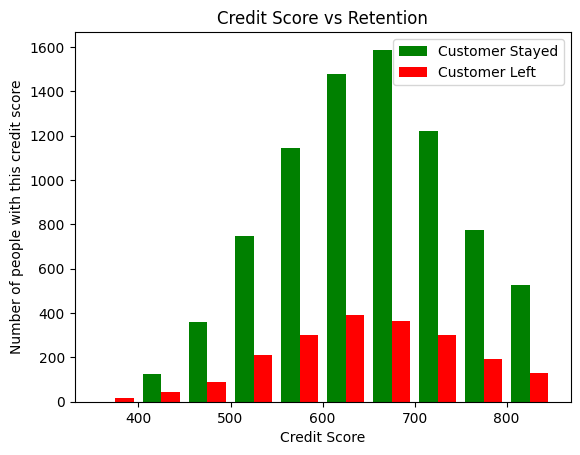

In [113]:
plt.xlabel('Credit Score')
plt.ylabel('Number of people with this credit score')
plt.title("Credit Score vs Retention")
plt.hist([Stayed['CreditScore'],Exited['CreditScore']],color=['green','red'],label=['Customer Stayed','Customer Left'])
plt.legend()

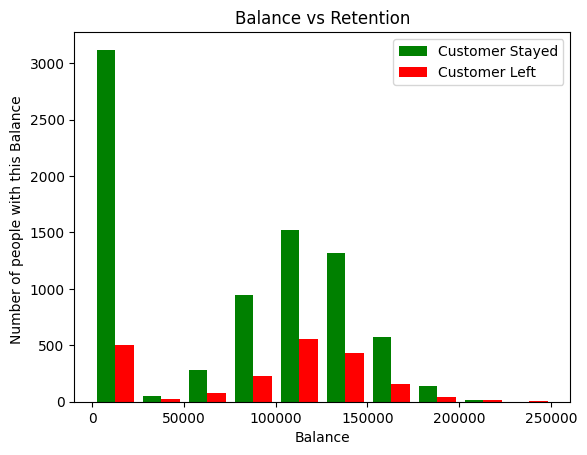

In [114]:
plt.xlabel('Balance')
plt.ylabel('Number of people with this Balance ')
plt.title("Balance vs Retention")
plt.hist([Stayed['Balance'],Exited['Balance']],color=['green','red'],label=['Customer Stayed','Customer Left'])
plt.legend()

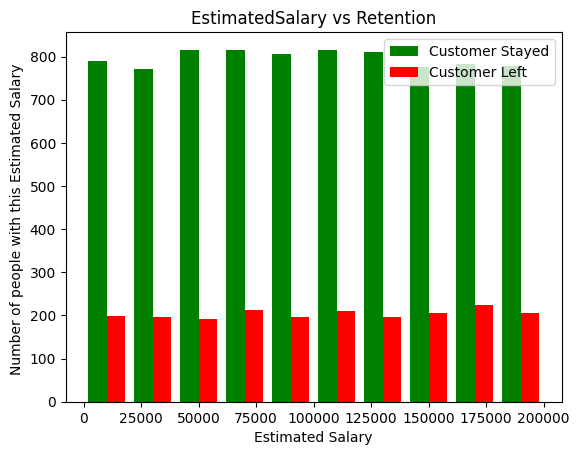

In [115]:
plt.xlabel('Estimated Salary')
plt.ylabel('Number of people with this Estimated Salary ')
plt.title("EstimatedSalary vs Retention")
plt.hist([Stayed['EstimatedSalary'],Exited['EstimatedSalary']],color=['green','red'],label=['Customer Stayed','Customer Left'])
plt.legend()

Hmm Estimated salary doesn't have much effect on Customer retention 
Maybe we can remove it ?

## Now lets scale the data, for faster and increase accuracy of our deep learning model

In [116]:
df2.sample(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
3370,698,0,47,6,0.00,1,1,0,50213.81,1,0,0,1
3337,579,1,56,4,99340.83,1,0,0,4523.74,1,0,0,1


In [117]:
checkData(df2)

Col: CreditScore , dtype: int64 , isna: [False] , isnull: [False]
Unique Data(460) like: [619 608 502 699 850] 

Col: Gender , dtype: int64 , isna: [False] , isnull: [False]
Unique Data(2) like: [0 1] 

Col: Age , dtype: int64 , isna: [False] , isnull: [False]
Unique Data(70) like: [42 41 39 43 44] 

Col: Tenure , dtype: int64 , isna: [False] , isnull: [False]
Unique Data(11) like: [2 1 8 7 4] 

Col: Balance , dtype: float64 , isna: [False] , isnull: [False]
Unique Data(6382) like: [     0.    83807.86 159660.8  125510.82 113755.78] 

Col: NumOfProducts , dtype: int64 , isna: [False] , isnull: [False]
Unique Data(4) like: [1 3 2 4] 

Col: HasCrCard , dtype: int64 , isna: [False] , isnull: [False]
Unique Data(2) like: [1 0] 

Col: IsActiveMember , dtype: int64 , isna: [False] , isnull: [False]
Unique Data(2) like: [1 0] 

Col: EstimatedSalary , dtype: float64 , isna: [False] , isnull: [False]
Unique Data(9999) like: [101348.88 112542.58 113931.57  93826.63  79084.1 ] 

Col: Exited , dty

In [118]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [119]:
colsToScale = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
scaler = MinMaxScaler()
scaler.fit(df2[colsToScale])

def getScaledData(df):
    df_copy = df.copy()
    df_copy[colsToScale] = scaler.transform(df_copy[colsToScale])
    return df_copy

getScaledData(df2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1,0,0
9996,0.332,1,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,1,0,0
9997,0.718,0,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1,0,0
9998,0.844,1,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,0,1,0


In [120]:
df2 = getScaledData(df2)
df2

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1,0,0
9996,0.332,1,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,1,0,0
9997,0.718,0,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1,0,0
9998,0.844,1,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,0,1,0


In [122]:
X_train,X_test, y_train,y_test = train_test_split(df2.drop('Exited',axis='columns'),df2['Exited'],random_state=5,test_size=0.3)

X_train.shape ,y_train.shape , X_test.shape ,y_test.shape 

((7000, 12), (7000,), (3000, 12), (3000,))

### Now lets try to build a neural network

In [125]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(12,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [127]:
%%capture --no-display
# Hiding such a big epoch output
model.fit(X_train,y_train,epochs=100)

In [128]:
model.evaluate(X_test,y_test)

94/94 [==============================] - 1s 9ms/step - loss: 0.3497 - accuracy: 0.8573


[0.34974002838134766, 0.8573333621025085]

#### 85.73% Acccuracy, Not bad

Lets try on a small dataset and look with our eyes

In [139]:
X10 = X_test[0:10]

y10pred = model.predict(X10)
y10pred = np.array([ 1 if y[0]>=0.5 else 0 for y in y10pred ])
print("predicted\n",y10pred,'\n')

y10real = y_test[0:10].to_numpy()

print("Real Ans\n",y10real,'\n')

1/1 [==============================] - 0s 37ms/step
predicted
 [0 0 0 0 0 0 0 0 0 1] 

Real Ans
 [0 0 0 0 0 0 0 1 0 1] 

